# Ejercicio 3

In [36]:
import random as rnd
import numpy as np

def gen_var(vars):
    ''' Toma n pares p_i, x_i y genera una variable aleatoria mezclando sus valoes
    '''
    u = rnd.random()
    f = 0
    for p, v in vars:
        f += p
        if f >= u:
            return v()

def var_exp(l):
    ''' genera valores con distribucion exponencial
    '''
    u = 1 - rnd.random()
    return -np.log(u) / l

def exp_acc(x, l):
    ''' funcion de probabilidad acumulada de una exponencial 
    '''
    return np.exp(-l*x) * (np.exp(l*x) - 1)

In [37]:
import time

def get_probs(g, nsim, *args):
    rnd.seed(1000)
    acc = []

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc.append(r)

    end = time.perf_counter()

    perf = end - start
    return acc, perf

Media real	: 4.4
Media estimada	: 4.427255132376302


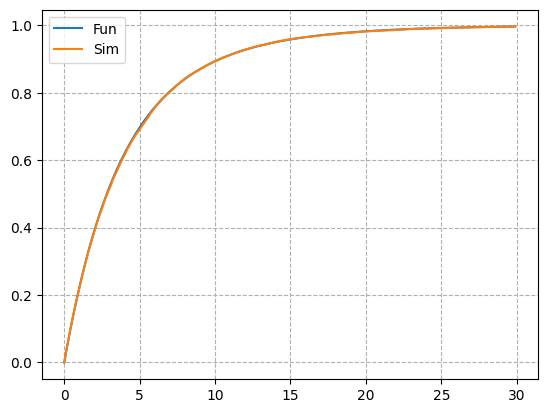

In [57]:
import matplotlib.pyplot as plt

''' Dibujamos las probabilidades acumuladas para comparar 
'''
vars = [
    (0.5, lambda :var_exp(1/3)),
    (0.3, lambda :var_exp(1/5)),
    (0.2, lambda :var_exp(1/7))
]
nsim = 10_000

acc, perf = get_probs(gen_var, nsim, vars)

x = np.arange(0,30,0.1)

def fun(x):
    return lambda x: 0.5 * exp_acc(x,1/3) + 0.3 * exp_acc(x,1/5) + 0.2 * exp_acc(x,1/7)

y = list(map(fun(x), x))
print(f'Media real\t: {0.5*3 + 0.3*5 + 0.2*7}')
plt.plot(x,y, label=f'Fun')

y = []
for i in x:
    f_le = list(filter(lambda k : k <= i, acc))
    v = len(f_le) / nsim
    y.append(v)
print(f'Media estimada\t: {np.mean(acc)}')
plt.plot(x,y, label='Sim')

plt.grid(linestyle = '--')
plt.legend()
plt.show()
